# How Diverse is TIME'S 100 Most Influential People List?

## 2. Cleaning and merging all the scraped data

So I actually ran every year's list scraping in a different notebook, and extracted 3 CSV files for each year: 

(1) The list of names, categories, year and link to the Time blurb

(2) Description, place, birthdate, age, pronouns for each person. 

   _Note: only about 40% of pronouns were extracted because descriptions were just one line   
     usually, not enough for a pronoun to appear. I added gender mostly manually._
     
 (3) The merged CSV for each of the above two dataframes. 
 
 #### ---
 
 After I got all of those, I am now combining it into one, manually removing errors and inconsistencies, and then preparing the dataframe with `geojson` stuff to map it. 

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option('max_colwidth', 50)

import re
import numpy as np

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df04 = pd.read_csv("Time2004_Full_merged.csv")
df07 = pd.read_csv("Time2007_Full_merged.csv")
df10 = pd.read_csv("Time2010_Full_merged.csv")
df13 = pd.read_csv("Time2013_Full_merged.csv")
df15 = pd.read_csv("Time2015_Full_merged.csv")
df17 = pd.read_csv("Time2017_Full_merged.csv")
df19 = pd.read_csv("Time2019_Full_merged.csv")
df20 = pd.read_csv("Time2020_Full_merged.csv")

In [3]:
df20 = df20.rename(columns ={'Nameright':'Name_right'})
df20 = df20.drop(columns='Unnamed: 0')
df20

Name  Category  Year  \
0           Megan Thee Stallion  PIONEERS  2020   
1         Giannis Antetokounmpo  PIONEERS  2020   
2                Ibram X. Kendi  PIONEERS  2020   
3                    Nathan Law  PIONEERS  2020   
4                  Tomi Adeyemi  PIONEERS  2020   
5                Christina Koch  PIONEERS  2020   
6                Julie K. Brown  PIONEERS  2020   
7              Cecilia Martinez  PIONEERS  2020   
8                    Maya Moore  PIONEERS  2020   
9                Chase Strangio  PIONEERS  2020   
10               Zhang Yongzhen  PIONEERS  2020   
11                   Tourmaline  PIONEERS  2020   
12               Waad al-Kateab  PIONEERS  2020   
13           Abubacarr Tambadou  PIONEERS  2020   
14              Gabriela Cámara  PIONEERS  2020   
15                Camilla Rothe  PIONEERS  2020   
16             Rebecca Gomperts  PIONEERS  2020   
17               Ravindra Gupta  PIONEERS  2020   
18               Lauren Gardner  PIONEERS  2020   
19                  Shi Zhengli  PIONEERS  2020   
20                   Shiori Ito  PIONEERS  2020   
21                   The Weeknd   ARTISTS  2020   
22                     Ali Wong   ARTISTS  2020   
23            Michael B. Jordan   ARTISTS  2020   
24                 Selena Gomez   ARTISTS  2020   
25                     J Balvin   ARTISTS  2020   
26                    JoJo Siwa   ARTISTS  2020   
27                       Halsey   ARTISTS  2020   
28         Phoebe Waller-Bridge   ARTISTS  2020   
29              Jennifer Hudson   ARTISTS  2020   
30                     Yo-Yo Ma   ARTISTS  2020   
31                   Dapper Dan   ARTISTS  2020   
32               Anaïs Mitchell   ARTISTS  2020   
33                Michaela Coel   ARTISTS  2020   
34                 Bong Joon Ho   ARTISTS  2020   
35                    Las Tesis   ARTISTS  2020   
36                Julie Mehretu   ARTISTS  2020   
37           Ayushmann Khurrana   ARTISTS  2020   
38                Anthony Fauci   LEADERS  2020   
39                Kamala Harris   LEADERS  2020   
40                 Tsai Ing-wen   LEADERS  2020   
41                 John Roberts   LEADERS  2020   
42                   Xi Jinping   LEADERS  2020   
43                 Donald Trump   LEADERS  2020   
44                       Caesar   LEADERS  2020   
45                Angela Merkel   LEADERS  2020   
46                    Joe Biden   LEADERS  2020   
47               Jair Bolsonaro   LEADERS  2020   
48                 Nancy Pelosi   LEADERS  2020   
49                Narendra Modi   LEADERS  2020   
50                 William Barr   LEADERS  2020   
51                 Anne Hidalgo   LEADERS  2020   
52   Tedros Adhanom Ghebreyesus   LEADERS  2020   
53               Mary Kay Henry   LEADERS  2020   
54             Nemonte Nenquimo   LEADERS  2020   
55         Ursula von der Leyen   LEADERS  2020   
56              Jung Eun-kyeong   LEADERS  2020   
57              Bonnie Castillo   LEADERS  2020   
58  Jean-Jacques Muyembe Tamfum   LEADERS  2020   
59             Yousef Al Otaiba   LEADERS  2020   
60              Gabrielle Union    TITANS  2020   
61                  Dwyane Wade    TITANS  2020   
62                Sundar Pichai    TITANS  2020   
63                  Tyler Perry    TITANS  2020   
64              MacKenzie Scott    TITANS  2020   
65              Robert F. Smith    TITANS  2020   
66               Lewis Hamilton    TITANS  2020   
67                Jerome Powell    TITANS  2020   
68                    Eric Yuan    TITANS  2020   
69              Patrick Mahomes    TITANS  2020   
70    Claire Babineaux-Fontenot    TITANS  2020   
71                Greg Berlanti    TITANS  2020   
72               Shari Redstone    TITANS  2020   
73                 Tony Elumelu    TITANS  2020   
74                Zhong Nanshan    TITANS  2020   
75         Kristalina Georgieva    TITANS  2020   
76               Lisa Nishimura    TITANS  2020   
77  General Charles Q. Brown Jr    TITANS  2020  

In [4]:
df_list = [df04, df07, df10, df13, df15, df17, df19, df20]

In [5]:
df19 = df19.drop(columns='index')
df19

Unnamed: 0                            Name  Category  Year  \
0            0                       Sandra Oh  PIONEERS  2019   
1            1                     Indya Moore  PIONEERS  2019   
2            2                    Marlon James  PIONEERS  2019   
3            3                  Chrissy Teigen  PIONEERS  2019   
4            4                 Massimo Bottura  PIONEERS  2019   
5            5                    Hasan Minhaj  PIONEERS  2019   
6            6                    Samin Nosrat  PIONEERS  2019   
7            7                           Ninja  PIONEERS  2019   
8            8                 Arundhati Katju  PIONEERS  2019   
9            9                     Naomi Osaka  PIONEERS  2019   
10          10                  Leah Greenberg  PIONEERS  2019   
11          11                   Fred Swaniker  PIONEERS  2019   
12          12                    Lynn Nottage  PIONEERS  2019   
13          13                   Tara Westover  PIONEERS  2019   
14          14                      Adam Bowen  PIONEERS  2019   
15          15              Barbara Rae-Venter  PIONEERS  2019   
16          16                      He Jiankui  PIONEERS  2019   
17          17                      Aileen Lee  PIONEERS  2019   
18          18      Jay O'Neal and Emily Comer  PIONEERS  2019   
19          19                   Shep Doeleman  PIONEERS  2019   
20          20                  Dwayne Johnson   ARTISTS  2019   
21          21                     Regina King   ARTISTS  2019   
22          22                          Khalid   ARTISTS  2019   
23          23                   Emilia Clarke   ARTISTS  2019   
24          24                             BTS   ARTISTS  2019   
25          25                     Brie Larson   ARTISTS  2019   
26          26          Joanna and Chip Gaines   ARTISTS  2019   
27          27                   Ariana Grande   ARTISTS  2019   
28          28                  Mahershala Ali   ARTISTS  2019   
29          29                     Glenn Close   ARTISTS  2019   
30          30                      Rami Malek   ARTISTS  2019   
31          31                 Luchita Hurtado   ARTISTS  2019   
32          32                           Ozuna   ARTISTS  2019   
33          33                   dream hampton   ARTISTS  2019   
34          34                  Richard Madden   ARTISTS  2019   
35          35                Yalitza Aparicio   ARTISTS  2019   
36          36             Clare Waight Keller   ARTISTS  2019   
37          37                    Nancy Pelosi   ARTISTS  2019   
38          38                    Donald Trump   LEADERS  2019   
39          39                  Greta Thunberg   LEADERS  2019   
40          40     Andrés Manuel López Obrador   LEADERS  2019   
41          41        Alexandria Ocasio-Cortez   LEADERS  2019   
42          42                  Jacinda Ardern   LEADERS  2019   
43          43                     Juan Guaidó   LEADERS  2019   
44          44                      Abiy Ahmed   LEADERS  2019   
45          45                 Mitch McConnell   LEADERS  2019   
46          46                 Brett Kavanaugh   LEADERS  2019   
47          47                    Jane Goodall   LEADERS  2019   
48          48              Benjamin Netanyahu   LEADERS  2019   
49          49                    Zhang Yiming   LEADERS  2019   
50          50                     Hoesung Lee   LEADERS  2019   
51          51                    William Barr   LEADERS  2019   
52          52                    Pope Francis   LEADERS  2019   
53          53                      Xi Jinping   LEADERS  2019   
54          54                       Leana Wen   LEADERS  2019   
55          55                      Imran Khan   LEADERS  2019   
56          56  Crown Prince Mohamed bin Zayed   LEADERS  2019   
57          57                 Cyril Ramaphosa   LEADERS  2019   
58          58                  Robert Mueller   LEADERS  2019   
59          59                Mahathir Moham

In [6]:
merged = pd.concat(df_list, axis=0)

In [7]:
merged = merged.reset_index()


In [8]:
merged = merged.drop("Unnamed: 0", axis=1)
merged

level_0                                               Name  \
0          0                                    George W. Bush    
1          1                                         Hu Jintao    
2          2                         Luiz Inácio Lula da Silva    
3          3                               Ali Husaini Sistani    
4          4                                   Toshihiko Fukui    
5          5                                    Abu al-Zarqawi    
6          6                                        Kofi Annan    
7          7                                   Condoleeza Rice    
8          8                              Recep Tayyip Erdogan    
9          9                                      John Abizaid    
10        10                                       Kim Jong Il    
11        11                                        Bill Gates    
12        12                                 Pope John Paul II    
13        13                              Atal Bihari Vajpayee    
14        14                                        John Kerry    
15        15                                       Luisa Diogo    
16        16                                     Vladmir Putin    
17        17                                             Wu Yi    
18        18                                   Osama bin Laden    
19        19                                      The Clintons    
20        20                                         Lee Scott    
21        21                                     Carly Fiorina    
22        22                                   Abigail Johnson    
23        23                                    David Neeleman    
24        24                                    Rupert Murdoch    
25        25                                Lindsay Owen-Jones    
26        26                                    Howard Schultz    
27        27                                       Azim Premji    
28        28                                    Warren Buffett    
29        29                                      Michael Dell    
30        30                                        Al-Jazeera    
31        31                                  Lord John Browne    
32        32                         Hiroshi Okuda / Fujio Cho    
33        33                          Sergei Brin / Larry Page    
34        34                                   Bernard Arnault    
35        35                                      Sepp Blatter    
36        36                                  Belinda Stronach    
37        37                                       Meg Whitman    
38        38                                    Daniel Vasella    
39        39                                        Steve Jobs    
40        40                                      Mark Burnett    
41        41                                       Frank Gehry    
42        42                                     John Galliano    
43        43                                     Peter Jackson    
44        44                                   Nicholas Hytner    
45        45                                      Simon Cowell    
46        46                                           OutKast    
47        47                                       Norah Jones    
48        48                                 Jerry Bruckheimer    
49        49                                      J.K. Rowling    
50        50                                      Ken Kutaragi    
51        51                                      Bruce Nauman    
52        52                                      Katie Couric    
53        53                                   Charlie Kaufman    
54        54                                      Hideo Nakata    
55        55                                     Aishwarya Rai    
56        56                                      Ferran Adrià    
57        57                                     Nicole Kidman    
58        58                                        

In [9]:
merged = merged.drop("level_0", axis=1)


In [10]:
merged

Name            Category  \
0                                      George W. Bush              LEADERS   
1                                           Hu Jintao              LEADERS   
2                           Luiz Inácio Lula da Silva              LEADERS   
3                                 Ali Husaini Sistani              LEADERS   
4                                     Toshihiko Fukui              LEADERS   
5                                      Abu al-Zarqawi              LEADERS   
6                                          Kofi Annan              LEADERS   
7                                     Condoleeza Rice              LEADERS   
8                                Recep Tayyip Erdogan              LEADERS   
9                                        John Abizaid              LEADERS   
10                                        Kim Jong Il              LEADERS   
11                                         Bill Gates              LEADERS   
12                                  Pope John Paul II              LEADERS   
13                               Atal Bihari Vajpayee              LEADERS   
14                                         John Kerry              LEADERS   
15                                        Luisa Diogo              LEADERS   
16                                      Vladmir Putin              LEADERS   
17                                              Wu Yi              LEADERS   
18                                    Osama bin Laden              LEADERS   
19                                       The Clintons              LEADERS   
20                                          Lee Scott               TITANS   
21                                      Carly Fiorina               TITANS   
22                                    Abigail Johnson               TITANS   
23                                     David Neeleman               TITANS   
24                                     Rupert Murdoch               TITANS   
25                                 Lindsay Owen-Jones               TITANS   
26                                     Howard Schultz               TITANS   
27                                        Azim Premji               TITANS   
28                                     Warren Buffett               TITANS   
29                                       Michael Dell               TITANS   
30                                         Al-Jazeera               TITANS   
31                                   Lord John Browne               TITANS   
32                          Hiroshi Okuda / Fujio Cho               TITANS   
33                           Sergei Brin / Larry Page               TITANS   
34                                    Bernard Arnault               TITANS   
35                                       Sepp Blatter               TITANS   
36                                   Belinda Stronach               TITANS   
37                                        Meg Whitman               TITANS   
38                                     Daniel Vasella               TITANS   
39                                         Steve Jobs               TITANS   
40                                       Mark Burnett              ARTISTS   
41                                        Frank Gehry              ARTISTS   
42                                      John Galliano              ARTISTS   
43                                      Peter Jackson              ARTISTS   
44                                    Nicholas Hytner              ARTISTS   
45                                       Simon Cowell              ARTISTS   
46                                            OutKast              ARTISTS   
47                                        Norah Jones              ARTISTS   
48                                  Jerry Bruckheimer              ARTISTS   
49                                       J.K. Rowling              ARTISTS   
50                                       Ken Kutaragi              ARTIS

In [11]:
!pip install xlrd

You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
merged.to_csv('MERGED_FULL_RAW.csv')

Here I had to manually sift through the csv (in Excel, admittedly) to add in gender pronouns that were missing values. It was a combination of research + other columns in the dataframe + common knownledge, and in ambiguous cases I left them blank.


Excel sort of messed up some values (as I had expected it to), so I intentionally kept the columns distinct. I will now read in the updated Excel file, then select all the columns I want in the **final** dataframe, including the new ones I wrote in.

In [13]:
df2 = pd.read_excel('MERGED_FULL_RAW_excel.xlsx')
df2

Unnamed: 0                                               Name  \
0             0                                    George W. Bush    
1             1                                         Hu Jintao    
2             2                        Luiz In√°cio Lula da Silva    
3             3                               Ali Husaini Sistani    
4             4                                   Toshihiko Fukui    
5             5                                    Abu al-Zarqawi    
6             6                                        Kofi Annan    
7             7                                   Condoleeza Rice    
8             8                              Recep Tayyip Erdogan    
9             9                                      John Abizaid    
10           10                                       Kim Jong Il    
11           11                                        Bill Gates    
12           12                                 Pope John Paul II    
13           13                              Atal Bihari Vajpayee    
14           14                                        John Kerry    
15           15                                       Luisa Diogo    
16           16                                     Vladmir Putin    
17           17                                             Wu Yi    
18           18                                   Osama bin Laden    
19           19                                      The Clintons    
20           20                                         Lee Scott    
21           21                                     Carly Fiorina    
22           22                                   Abigail Johnson    
23           23                                    David Neeleman    
24           24                                    Rupert Murdoch    
25           25                                Lindsay Owen-Jones    
26           26                                    Howard Schultz    
27           27                                       Azim Premji    
28           28                                    Warren Buffett    
29           29                                      Michael Dell    
30           30                                        Al-Jazeera    
31           31                                  Lord John Browne    
32           32                         Hiroshi Okuda / Fujio Cho    
33           33                          Sergei Brin / Larry Page    
34           34                                   Bernard Arnault    
35           35                                      Sepp Blatter    
36           36                                  Belinda Stronach    
37           37                                       Meg Whitman    
38           38                                    Daniel Vasella    
39           39                                        Steve Jobs    
40           40                                      Mark Burnett    
41           41                                       Frank Gehry    
42           42                                     John Galliano    
43           43                                     Peter Jackson    
44           44                                   Nicholas Hytner    
45           45                                      Simon Cowell    
46           46                                           OutKast    
47           47                                       Norah Jones    
48           48                                 Jerry Bruckheimer    
49           49                                      J.K. Rowling    
50           50                                      Ken Kutaragi    
51           51                                      Bruce Nauman    
52           52                                      Katie Couric    
53           53                                   Charlie Kaufman    
54           54                                      Hideo Nakata    
55           55                                     Aishwarya Rai    
56           56

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   788 non-null    int64         
 1   Name         788 non-null    object        
 2   Category     788 non-null    object        
 3   Year         788 non-null    int64         
 4   Name_right   788 non-null    object        
 5   Profession   776 non-null    object        
 6   Place        744 non-null    object        
 7   Birthdate    714 non-null    datetime64[ns]
 8   Age          687 non-null    float64       
 9   Pronouns     720 non-null    object        
 10  Birth Info   788 non-null    object        
 11  Link         788 non-null    object        
 12  Description  788 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 80.2+ KB


In [15]:
df2.Pronouns = df2.Pronouns.fillna('Unknown')

## Adding a gender column

I had a lot of pronouns, and I added most in manually going through the csv, but now I will convert that into a gender column so it can be useful in the mapping stage. Had to run an individual regex for each pronoun without undoing the previous variable.

In [16]:
df2['Gender'] = df2.Pronouns

In [17]:
df2.Gender[df2.Gender.str.match(r"\bhe(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bhe(?i)\b")].str.replace(r"\bhe(?i)\b", 'Male')



<ipython-input-17-410b67da5aed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Gender[df2.Gender.str.match(r"\bhe(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bhe(?i)\b")].str.replace(r"\bhe(?i)\b", 'Male')


In [18]:
df2.Gender[df2.Gender.str.match(r"\bhis(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bhis(?i)\b")].str.replace(r"\bhis(?i)\b", 'Male')

<ipython-input-18-33d081c48604>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Gender[df2.Gender.str.match(r"\bhis(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bhis(?i)\b")].str.replace(r"\bhis(?i)\b", 'Male')


In [19]:
df2.Gender[df2.Gender.str.match(r"\bshe(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bshe(?i)\b")].str.replace(r"\bshe(?i)\b", 'Female')

<ipython-input-19-82329263e765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Gender[df2.Gender.str.match(r"\bshe(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bshe(?i)\b")].str.replace(r"\bshe(?i)\b", 'Female')


In [20]:
df2.Gender[df2.Gender.str.match(r"\bher(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bher(?i)\b")].str.replace(r"\bher(?i)\b", 'Female')



<ipython-input-20-41c464d7af41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Gender[df2.Gender.str.match(r"\bher(?i)\b")] = df2.Gender[df2.Gender.str.match(r"\bher(?i)\b")].str.replace(r"\bher(?i)\b", 'Female')


In [21]:
#df2.Gender = df2.Gender.fillna(df2.Pronouns)

In [22]:
df2.Gender.value_counts()

Male       456
Female     263
Unknown     68
they         1
Name: Gender, dtype: int64

## Final clean up
There were lots of extra columns, so now I'm selecting the actual ones I want from the Scraped df, the Demographic df, and the Updated df to give me Final df

In [23]:
selected_og = merged[["Name", "Category", "Year", "Description", "Link"]]
selected_og

Name            Category  \
0                                      George W. Bush              LEADERS   
1                                           Hu Jintao              LEADERS   
2                           Luiz Inácio Lula da Silva              LEADERS   
3                                 Ali Husaini Sistani              LEADERS   
4                                     Toshihiko Fukui              LEADERS   
5                                      Abu al-Zarqawi              LEADERS   
6                                          Kofi Annan              LEADERS   
7                                     Condoleeza Rice              LEADERS   
8                                Recep Tayyip Erdogan              LEADERS   
9                                        John Abizaid              LEADERS   
10                                        Kim Jong Il              LEADERS   
11                                         Bill Gates              LEADERS   
12                                  Pope John Paul II              LEADERS   
13                               Atal Bihari Vajpayee              LEADERS   
14                                         John Kerry              LEADERS   
15                                        Luisa Diogo              LEADERS   
16                                      Vladmir Putin              LEADERS   
17                                              Wu Yi              LEADERS   
18                                    Osama bin Laden              LEADERS   
19                                       The Clintons              LEADERS   
20                                          Lee Scott               TITANS   
21                                      Carly Fiorina               TITANS   
22                                    Abigail Johnson               TITANS   
23                                     David Neeleman               TITANS   
24                                     Rupert Murdoch               TITANS   
25                                 Lindsay Owen-Jones               TITANS   
26                                     Howard Schultz               TITANS   
27                                        Azim Premji               TITANS   
28                                     Warren Buffett               TITANS   
29                                       Michael Dell               TITANS   
30                                         Al-Jazeera               TITANS   
31                                   Lord John Browne               TITANS   
32                          Hiroshi Okuda / Fujio Cho               TITANS   
33                           Sergei Brin / Larry Page               TITANS   
34                                    Bernard Arnault               TITANS   
35                                       Sepp Blatter               TITANS   
36                                   Belinda Stronach               TITANS   
37                                        Meg Whitman               TITANS   
38                                     Daniel Vasella               TITANS   
39                                         Steve Jobs               TITANS   
40                                       Mark Burnett              ARTISTS   
41                                        Frank Gehry              ARTISTS   
42                                      John Galliano              ARTISTS   
43                                      Peter Jackson              ARTISTS   
44                                    Nicholas Hytner              ARTISTS   
45                                       Simon Cowell              ARTISTS   
46                                            OutKast              ARTISTS   
47                                        Norah Jones              ARTISTS   
48                                  Jerry Bruckheimer              ARTISTS   
49                                       J.K. Rowling              ARTISTS   
50                                       Ken Kutaragi              ARTIS

In [24]:
selected_og

Name            Category  \
0                                      George W. Bush              LEADERS   
1                                           Hu Jintao              LEADERS   
2                           Luiz Inácio Lula da Silva              LEADERS   
3                                 Ali Husaini Sistani              LEADERS   
4                                     Toshihiko Fukui              LEADERS   
5                                      Abu al-Zarqawi              LEADERS   
6                                          Kofi Annan              LEADERS   
7                                     Condoleeza Rice              LEADERS   
8                                Recep Tayyip Erdogan              LEADERS   
9                                        John Abizaid              LEADERS   
10                                        Kim Jong Il              LEADERS   
11                                         Bill Gates              LEADERS   
12                                  Pope John Paul II              LEADERS   
13                               Atal Bihari Vajpayee              LEADERS   
14                                         John Kerry              LEADERS   
15                                        Luisa Diogo              LEADERS   
16                                      Vladmir Putin              LEADERS   
17                                              Wu Yi              LEADERS   
18                                    Osama bin Laden              LEADERS   
19                                       The Clintons              LEADERS   
20                                          Lee Scott               TITANS   
21                                      Carly Fiorina               TITANS   
22                                    Abigail Johnson               TITANS   
23                                     David Neeleman               TITANS   
24                                     Rupert Murdoch               TITANS   
25                                 Lindsay Owen-Jones               TITANS   
26                                     Howard Schultz               TITANS   
27                                        Azim Premji               TITANS   
28                                     Warren Buffett               TITANS   
29                                       Michael Dell               TITANS   
30                                         Al-Jazeera               TITANS   
31                                   Lord John Browne               TITANS   
32                          Hiroshi Okuda / Fujio Cho               TITANS   
33                           Sergei Brin / Larry Page               TITANS   
34                                    Bernard Arnault               TITANS   
35                                       Sepp Blatter               TITANS   
36                                   Belinda Stronach               TITANS   
37                                        Meg Whitman               TITANS   
38                                     Daniel Vasella               TITANS   
39                                         Steve Jobs               TITANS   
40                                       Mark Burnett              ARTISTS   
41                                        Frank Gehry              ARTISTS   
42                                      John Galliano              ARTISTS   
43                                      Peter Jackson              ARTISTS   
44                                    Nicholas Hytner              ARTISTS   
45                                       Simon Cowell              ARTISTS   
46                                            OutKast              ARTISTS   
47                                        Norah Jones              ARTISTS   
48                                  Jerry Bruckheimer              ARTISTS   
49                                       J.K. Rowling              ARTISTS   
50                                       Ken Kutaragi              ARTIS

In [25]:
selected_new = df2[["Name", "Profession", "Place", "Birthdate", "Age", "Gender", "Link"]]
selected_new

Name  \
0                                      George W. Bush    
1                                           Hu Jintao    
2                          Luiz In√°cio Lula da Silva    
3                                 Ali Husaini Sistani    
4                                     Toshihiko Fukui    
5                                      Abu al-Zarqawi    
6                                          Kofi Annan    
7                                     Condoleeza Rice    
8                                Recep Tayyip Erdogan    
9                                        John Abizaid    
10                                        Kim Jong Il    
11                                         Bill Gates    
12                                  Pope John Paul II    
13                               Atal Bihari Vajpayee    
14                                         John Kerry    
15                                        Luisa Diogo    
16                                      Vladmir Putin    
17                                              Wu Yi    
18                                    Osama bin Laden    
19                                       The Clintons    
20                                          Lee Scott    
21                                      Carly Fiorina    
22                                    Abigail Johnson    
23                                     David Neeleman    
24                                     Rupert Murdoch    
25                                 Lindsay Owen-Jones    
26                                     Howard Schultz    
27                                        Azim Premji    
28                                     Warren Buffett    
29                                       Michael Dell    
30                                         Al-Jazeera    
31                                   Lord John Browne    
32                          Hiroshi Okuda / Fujio Cho    
33                           Sergei Brin / Larry Page    
34                                    Bernard Arnault    
35                                       Sepp Blatter    
36                                   Belinda Stronach    
37                                        Meg Whitman    
38                                     Daniel Vasella    
39                                         Steve Jobs    
40                                       Mark Burnett    
41                                        Frank Gehry    
42                                      John Galliano    
43                                      Peter Jackson    
44                                    Nicholas Hytner    
45                                       Simon Cowell    
46                                            OutKast    
47                                        Norah Jones    
48                                  Jerry Bruckheimer    
49                                       J.K. Rowling    
50                                       Ken Kutaragi    
51                                       Bruce Nauman    
52                                       Katie Couric    
53                                    Charlie Kaufman    
54                                       Hideo Nakata    
55                                      Aishwarya Rai    
56                                      Ferran Adri√†    
57                                      Nicole Kidman    
58                                          Sean Penn    
59                                     Guy Lalibert√©    
60                                     Nelson Mandela    
61                                   Aung San Suu Kyi    
62                              Queen Rania of Jordan    
63                                       Shirin Ebadi    
64                                               Bono    
65                                   Bernard Kouchner    
66                                    Bill Bellichick    
67                                      David Beckham    
68                                    Lance Arms

In [26]:
final = selected_og.join(selected_new, rsuffix='_right')

In [27]:
final

Name            Category  \
0                                      George W. Bush              LEADERS   
1                                           Hu Jintao              LEADERS   
2                           Luiz Inácio Lula da Silva              LEADERS   
3                                 Ali Husaini Sistani              LEADERS   
4                                     Toshihiko Fukui              LEADERS   
5                                      Abu al-Zarqawi              LEADERS   
6                                          Kofi Annan              LEADERS   
7                                     Condoleeza Rice              LEADERS   
8                                Recep Tayyip Erdogan              LEADERS   
9                                        John Abizaid              LEADERS   
10                                        Kim Jong Il              LEADERS   
11                                         Bill Gates              LEADERS   
12                                  Pope John Paul II              LEADERS   
13                               Atal Bihari Vajpayee              LEADERS   
14                                         John Kerry              LEADERS   
15                                        Luisa Diogo              LEADERS   
16                                      Vladmir Putin              LEADERS   
17                                              Wu Yi              LEADERS   
18                                    Osama bin Laden              LEADERS   
19                                       The Clintons              LEADERS   
20                                          Lee Scott               TITANS   
21                                      Carly Fiorina               TITANS   
22                                    Abigail Johnson               TITANS   
23                                     David Neeleman               TITANS   
24                                     Rupert Murdoch               TITANS   
25                                 Lindsay Owen-Jones               TITANS   
26                                     Howard Schultz               TITANS   
27                                        Azim Premji               TITANS   
28                                     Warren Buffett               TITANS   
29                                       Michael Dell               TITANS   
30                                         Al-Jazeera               TITANS   
31                                   Lord John Browne               TITANS   
32                          Hiroshi Okuda / Fujio Cho               TITANS   
33                           Sergei Brin / Larry Page               TITANS   
34                                    Bernard Arnault               TITANS   
35                                       Sepp Blatter               TITANS   
36                                   Belinda Stronach               TITANS   
37                                        Meg Whitman               TITANS   
38                                     Daniel Vasella               TITANS   
39                                         Steve Jobs               TITANS   
40                                       Mark Burnett              ARTISTS   
41                                        Frank Gehry              ARTISTS   
42                                      John Galliano              ARTISTS   
43                                      Peter Jackson              ARTISTS   
44                                    Nicholas Hytner              ARTISTS   
45                                       Simon Cowell              ARTISTS   
46                                            OutKast              ARTISTS   
47                                        Norah Jones              ARTISTS   
48                                  Jerry Bruckheimer              ARTISTS   
49                                       J.K. Rowling              ARTISTS   
50                                       Ken Kutaragi              ARTIS

In [28]:
df = final[["Name", "Category", "Year", "Profession", "Place", "Gender", "Birthdate", "Age", "Description", "Link" ]]

df

Name            Category  \
0                                      George W. Bush              LEADERS   
1                                           Hu Jintao              LEADERS   
2                           Luiz Inácio Lula da Silva              LEADERS   
3                                 Ali Husaini Sistani              LEADERS   
4                                     Toshihiko Fukui              LEADERS   
5                                      Abu al-Zarqawi              LEADERS   
6                                          Kofi Annan              LEADERS   
7                                     Condoleeza Rice              LEADERS   
8                                Recep Tayyip Erdogan              LEADERS   
9                                        John Abizaid              LEADERS   
10                                        Kim Jong Il              LEADERS   
11                                         Bill Gates              LEADERS   
12                                  Pope John Paul II              LEADERS   
13                               Atal Bihari Vajpayee              LEADERS   
14                                         John Kerry              LEADERS   
15                                        Luisa Diogo              LEADERS   
16                                      Vladmir Putin              LEADERS   
17                                              Wu Yi              LEADERS   
18                                    Osama bin Laden              LEADERS   
19                                       The Clintons              LEADERS   
20                                          Lee Scott               TITANS   
21                                      Carly Fiorina               TITANS   
22                                    Abigail Johnson               TITANS   
23                                     David Neeleman               TITANS   
24                                     Rupert Murdoch               TITANS   
25                                 Lindsay Owen-Jones               TITANS   
26                                     Howard Schultz               TITANS   
27                                        Azim Premji               TITANS   
28                                     Warren Buffett               TITANS   
29                                       Michael Dell               TITANS   
30                                         Al-Jazeera               TITANS   
31                                   Lord John Browne               TITANS   
32                          Hiroshi Okuda / Fujio Cho               TITANS   
33                           Sergei Brin / Larry Page               TITANS   
34                                    Bernard Arnault               TITANS   
35                                       Sepp Blatter               TITANS   
36                                   Belinda Stronach               TITANS   
37                                        Meg Whitman               TITANS   
38                                     Daniel Vasella               TITANS   
39                                         Steve Jobs               TITANS   
40                                       Mark Burnett              ARTISTS   
41                                        Frank Gehry              ARTISTS   
42                                      John Galliano              ARTISTS   
43                                      Peter Jackson              ARTISTS   
44                                    Nicholas Hytner              ARTISTS   
45                                       Simon Cowell              ARTISTS   
46                                            OutKast              ARTISTS   
47                                        Norah Jones              ARTISTS   
48                                  Jerry Bruckheimer              ARTISTS   
49                                       J.K. Rowling              ARTISTS   
50                                       Ken Kutaragi              ARTIS

In [29]:
#final2 = final2.rename(columns={'Name_x':'Name'})

In [30]:
df.Age = df.Age.fillna(0)
df.Age = df.Age.astype(int)

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
# final2.Age = final2.Age.replace(0, np.nan)

In [32]:
df.head(10)

Name Category  Year  \
0             George W. Bush   LEADERS  2004   
1                  Hu Jintao   LEADERS  2004   
2  Luiz Inácio Lula da Silva   LEADERS  2004   
3        Ali Husaini Sistani   LEADERS  2004   
4            Toshihiko Fukui   LEADERS  2004   
5             Abu al-Zarqawi   LEADERS  2004   
6                 Kofi Annan   LEADERS  2004   
7            Condoleeza Rice   LEADERS  2004   
8       Recep Tayyip Erdogan   LEADERS  2004   
9               John Abizaid   LEADERS  2004   

                                          Profession  \
0                                43rd U.S. President   
1  Former President of the People's Republic of C...   
2                         Former President of Brazil   
3                                          Ayatollah   
4                                 Japanese economist   
5                                          Terrorist   
6                                  Ghanaian diplomat   
7            Former United States Secretary of State   
8                                President of Turkey   
9           United States Ambassador to Saudi Arabia   

                        Place  Gender  Birthdate  Age  \
0               New Haven, CT    Male 1946-07-06   74   
1              Taizhou, China    Male 1942-12-21   77   
2              Caetés, Brazil    Male 1945-10-27   75   
3               Mashhad, Iran    Male 1930-08-03   90   
4         Osaka, Osaka, Japan    Male 1935-09-07   85   
5               Zarqa, Jordan    Male 1966-10-30    0   
6               Kumasi, Ghana    Male 1938-04-08    0   
7              Birmingham, AL  Female 1954-11-14   66   
8  Kasımpaşa, Beyoğlu, Turkey    Male 1954-02-26   66   
9            Redwood City, CA    Male 1951-04-01   69   

                                         Description  \
0  George Walker Bush is an American politician a...   
1  Hu Jintao is a Chinese politician, who was Gen...   
2  Luiz Inácio Lula da Silva, known as Lula, is a...   
3  Grand Ayatollah Sayyid Ali al-Husayni al-Sista...   
4  Toshihiko Fukui is a Japanese economist and ce...   
5  Abu Musab al-Zarqawi, born Ahmad Fadeel al-Naz...   
6  Kofi Atta Annan was a Ghanaian diplomat who se...   
7  Condoleezza "Condi" Rice is an American diplom...   
8  Recep Tayyip Erdoğan is a Turkish politician s...   
9  John Philip Abizaid is a retired United States...   

                                                Link  
0  www.content.time.com/time/specials/packages/ar...  
1  www.content.time.com/time/specials/packages/ar...  
2  www.content.time.com/time/specials/packages/ar...  
3  www.content.time.com/time/specials/packages/ar...  
4  www.content.time.com/time/specials/packages/ar...  
5  www.content.time.com/time/specials/packages/ar...  
6  www.content.time.com/time/specials/packages/ar...  
7  www.content.time.com/time/specials/packages/ar...  
8  www.content.time.com/time/specials/packages/ar...  
9  www.content.time.com/time/specials/packages/ar...

# Some basic analysis 

In [33]:
df.Age[df.Age != 0].groupby(df.Year).value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).to_frame()



Age
Year Age     
2004 66     6
     60     4
     73     4
     50     3
     55     3
2007 73     6
     59     5
     65     5
     66     4
     72     4
2010 66     6
     42     4
     47     4
     71     4
     75     4
2013 39     5
     51     4
     75     4
     30     3
     36     3
2015 60     7
     56     5
     36     4
     50     4
     52     4
2017 39     4
     48     4
     68     4
     30     3
     41     3
2019 34     5
     31     4
     50     4
     56     4
     35     3
2020 35     6
     36     4
     48     4
     50     4
     38     3

In [34]:
df.Age[df.Age != 0].groupby(df.Year).mean()



Year
2004    66.222222
2007    64.021739
2010    59.500000
2013    55.109756
2015    56.673913
2017    51.682353
2019    50.252874
2020    48.928571
Name: Age, dtype: float64

In [35]:
df.Gender[df.Gender != 'Unknown'].groupby(df.Year).value_counts(normalize=True) * 100

Year  Gender
2004  Male      77.083333
      Female    22.916667
2007  Male      70.103093
      Female    29.896907
2010  Male      68.478261
      Female    31.521739
2013  Male      64.935065
      Female    35.064935
2015  Male      61.290323
      Female    38.709677
2017  Male      64.444444
      Female    35.555556
2019  Male      50.588235
      Female    48.235294
      they       1.176471
2020  Female    52.222222
      Male      47.777778
Name: Gender, dtype: float64

In [36]:
df.Gender.groupby(df.Year).value_counts(normalize=True) * 100

Year  Gender 
2004  Male       74.000000
      Female     22.000000
      Unknown     4.000000
2007  Male       68.000000
      Female     29.000000
      Unknown     3.000000
2010  Male       63.000000
      Female     29.000000
      Unknown     8.000000
2013  Male       53.191489
      Female     28.723404
      Unknown    18.085106
2015  Male       57.000000
      Female     36.000000
      Unknown     7.000000
2017  Male       61.052632
      Female     33.684211
      Unknown     5.263158
2019  Male       43.434343
      Female     41.414141
      Unknown    14.141414
      they        1.010101
2020  Female     47.000000
      Male       43.000000
      Unknown    10.000000
Name: Gender, dtype: float64

In [37]:
df.Place[~df.Place.isna()].groupby(df.Year).value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).to_frame()



Place
Year Place                        
2004 Brooklyn, New York, NY      3
     London, United Kingdom      3
     Detroit, MI                 2
     Montreal, Canada            2
     New York, NY                2
2007 Los Angeles, CA             3
     Chicago, IL                 2
     New York, NY                2
     Abeokuta, Nigeria           1
     Alexandria, Egypt           1
2010 New York, NY                5
     Minneapolis, MN             2
     New Delhi, India            2
      Cape May, NJ               1
     Abidjan, Côte d'Ivoire      1
2013 New York, NY                4
     Brooklyn, New York, NY      2
     Chicago, IL                 2
     New Jersey                  2
     Akron, OH                   1
2015 Philadelphia, PA            3
     Brooklyn, New York, NY      2
     Chicago, IL                 2
     Mobile, AL                  2
     New York, NY                2
2017 Los Angeles, CA             3
     New York, NY                3
     Albuquerque, NM             2
     Beijing, China              2
     Brooklyn, New York, NY      2
2019 New York, NY                5
     Washington, D.C.            3
     Chevy Chase, MD             2
     Detroit, MI                 2
     Dublin, Ireland             2
2020 New York, NY                4
     Los Angeles, CA             3
     Chicago, IL                 2
     Massachusetts               2
     Omaha, NE                   2

In [38]:
df.Place[~df.Place.isna()].groupby(df.Year).value_counts().groupby(level=0).nsmallest(5).reset_index(level=0, drop=True).to_frame()



Place
Year Place                                 
2004 Arlington County, VA                 1
     Aurora, CO                           1
     Austin, TX                           1
     Avignon, France                      1
     Baltimore, MD                        1
2007 Abeokuta, Nigeria                    1
     Alexandria, Egypt                    1
     Amman, Jordan                        1
     Baku, Azerbaijan                     1
     Baltimore, MD                        1
2010  Cape May, NJ                        1
     Abidjan, Côte d'Ivoire               1
     Addis Ababa, Ethiopia                1
     Albuquerque, NM                      1
     Ambasamudram, India                  1
2013 Akron, OH                            1
     Amarillo, TX                         1
     Atlacomulco de Fabela, Mexico        1
     Bay Ridge, New York, NY              1
     Beijing, China                       1
2015 Aberdeen, United Kingdom             1
     Amsterdam, NY                        1
     Anambra, Nigeria                     1
     Athens, Greece                       1
     Atlanta, GA                          1
2017 Akron, OH                            1
     Alice, TX                            1
     Aligarh, India                       1
     Anoka, MN                            1
     Ashiya, Hyogo, Japan                 1
2019 Akron, OH                            1
     Al Ain, United Arab Emirates         1
     Alor Setar, Malaysia                 1
     Atlanta, GA                          1
     Auckland, New Zealand                1
2020 Abu Dhabi, United Arab Emirates      1
     Addis Ababa, Ethiopia                1
     Asmara, Eritrea                      1
     Athens, Greece                       1
     Baltimore, MD                        1

### Oops, cities are kind of meaningless to group by.
So I'm extracting a new column with the country + replacing US states with 'USA' so I can look through trends in countries.

In [39]:
df['Country'] = df.Place.str.extract(r"[\w\W]+, ([\w\W]+)$")
df

<ipython-input-39-f48ddec85332>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df.Place.str.extract(r"[\w\W]+, ([\w\W]+)$")


Name            Category  \
0                                      George W. Bush              LEADERS   
1                                           Hu Jintao              LEADERS   
2                           Luiz Inácio Lula da Silva              LEADERS   
3                                 Ali Husaini Sistani              LEADERS   
4                                     Toshihiko Fukui              LEADERS   
5                                      Abu al-Zarqawi              LEADERS   
6                                          Kofi Annan              LEADERS   
7                                     Condoleeza Rice              LEADERS   
8                                Recep Tayyip Erdogan              LEADERS   
9                                        John Abizaid              LEADERS   
10                                        Kim Jong Il              LEADERS   
11                                         Bill Gates              LEADERS   
12                                  Pope John Paul II              LEADERS   
13                               Atal Bihari Vajpayee              LEADERS   
14                                         John Kerry              LEADERS   
15                                        Luisa Diogo              LEADERS   
16                                      Vladmir Putin              LEADERS   
17                                              Wu Yi              LEADERS   
18                                    Osama bin Laden              LEADERS   
19                                       The Clintons              LEADERS   
20                                          Lee Scott               TITANS   
21                                      Carly Fiorina               TITANS   
22                                    Abigail Johnson               TITANS   
23                                     David Neeleman               TITANS   
24                                     Rupert Murdoch               TITANS   
25                                 Lindsay Owen-Jones               TITANS   
26                                     Howard Schultz               TITANS   
27                                        Azim Premji               TITANS   
28                                     Warren Buffett               TITANS   
29                                       Michael Dell               TITANS   
30                                         Al-Jazeera               TITANS   
31                                   Lord John Browne               TITANS   
32                          Hiroshi Okuda / Fujio Cho               TITANS   
33                           Sergei Brin / Larry Page               TITANS   
34                                    Bernard Arnault               TITANS   
35                                       Sepp Blatter               TITANS   
36                                   Belinda Stronach               TITANS   
37                                        Meg Whitman               TITANS   
38                                     Daniel Vasella               TITANS   
39                                         Steve Jobs               TITANS   
40                                       Mark Burnett              ARTISTS   
41                                        Frank Gehry              ARTISTS   
42                                      John Galliano              ARTISTS   
43                                      Peter Jackson              ARTISTS   
44                                    Nicholas Hytner              ARTISTS   
45                                       Simon Cowell              ARTISTS   
46                                            OutKast              ARTISTS   
47                                        Norah Jones              ARTISTS   
48                                  Jerry Bruckheimer              ARTISTS   
49                                       J.K. Rowling              ARTISTS   
50                                       Ken Kutaragi              ARTIS

In [40]:
df.Country = df.Country.fillna('Null')

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
df.Country[df.Country.str.match(r"\b\w\w\b")] = df.Country[df.Country.str.match(r"\b\w\w\b")].str.replace((r"\b\w\w\b"),'USA')

<ipython-input-41-63fc5f648b0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Country[df.Country.str.match(r"\b\w\w\b")] = df.Country[df.Country.str.match(r"\b\w\w\b")].str.replace((r"\b\w\w\b"),'USA')
/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


## FINAL DF WITH ALL THE INFO! 
Saving to a CSV.

In [42]:
df.to_csv("Final_Time_list_all.csv")

## More analysis

In [43]:
df.Country[df.Country != 'Null'].groupby(df.Year).value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).to_frame()


Country
Year Country                
2004 USA                  36
     United Kingdom        9
     Canada                5
     China                 4
     India                 4
2007 USA                  42
     United Kingdom        7
     Australia             3
     Germany               3
     India                 3
2010 USA                  39
     India                 8
     United Kingdom        5
     China                 3
     France                3
2013 USA                  40
     China                 5
     India                 3
     United Kingdom        3
     Brazil                2
2015 USA                  45
     China                 5
     France                4
     India                 4
     Nigeria               4
2017 USA                  47
     United Kingdom        5
     China                 4
     Canada                3
     Australia             2
2019 USA                  42
     China                 6
     United Kingdom        5
     D.C.                  3
     India                 3
2020 USA                  43
     China                 7
     India                 4
     United Kingdom        3
     Brazil                2

On average, how often does the US appear on a Times list?

In [44]:
df.Country[df.Country == 'USA'].groupby(df.Year).count()


Year
2004    36
2007    42
2010    39
2013    40
2015    45
2017    47
2019    42
2020    43
Name: Country, dtype: int64

In [45]:
df.Country[df.Country == 'USA'].groupby(df.Year).count().mean()


41.75

In [46]:
df.Country[df.Country != 'USA'].groupby(df.Year).count()

Year
2004    64
2007    58
2010    61
2013    54
2015    55
2017    48
2019    57
2020    57
Name: Country, dtype: int64

In [47]:
df.Country[df.Country != 'USA'].groupby(df.Year).count().mean()

56.75

In [48]:
df.Country[df.Country != 'Null'].groupby(df.Year).value_counts()

Year  Country             
2004  USA                     36
      United Kingdom           9
      Canada                   5
      China                    4
      India                    4
      Germany                  3
      Switzerland              3
      Brazil                   2
      France                   2
      Iran                     2
      Ireland                  2
      Japan                    2
      South Korea              2
      Australia                1
      Austria                  1
      Denmark                  1
      Finland                  1
      Ghana                    1
      Italy                    1
      Jordan                   1
      Kuwait                   1
      Mozambique               1
      Myanmar                  1
      New Zealand              1
      Okayama                  1
      Peru                     1
      Qatar                    1
      Russia                   1
      Saudi Arabia             1
      South Afri

### Category changes

In [49]:
df.Category.groupby(df.Year).value_counts()

Year  Category          
2004  ARTISTS               20
      ICONS                 20
      LEADERS               20
      PIONEERS              20
      TITANS                20
2007  ARTISTS               22
      LEADERS               21
      ICONS AND THINKERS    19
      PIONEERS              19
      TITANS                19
2010  ARTISTS               25
      ICONS                 25
      LEADERS               25
      PIONEERS              25
2013  LEADERS               23
      PIONEERS              21
      TITANS                20
      ARTISTS               16
      ICONS                 14
2015  LEADERS               31
      PIONEERS              22
      TITANS                20
      ARTISTS               16
      ICONS                 11
2017  LEADERS               24
      ICONS                 20
      PIONEERS              20
      ARTISTS               17
      TITANS                14
2019  LEADERS               26
      PIONEERS              24
      ARTISTS 

<AxesSubplot:ylabel='Category,Year'>

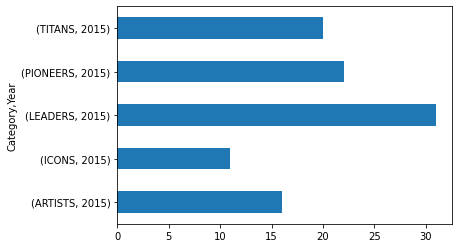

In [50]:
df.Year[df.Year == 2015].groupby(df.Category).value_counts().plot(kind='barh')

In [51]:
df.Country[df.Country != 'Null'].groupby(df.Category).value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).to_frame()

Country
Category           Country                
ARTISTS            USA                  87
                   United Kingdom       23
                   Canada                5
                   India                 3
                   Australia             2
ICONS              USA                  44
                   China                 7
                   India                 6
                   United Kingdom        4
                   Brazil                3
ICONS AND THINKERS USA                   8
                   Australia             1
                   D.C.                  1
                   Germany               1
                   Kenya                 1
LEADERS            USA                  64
                   China                14
                   India                 6
                   Brazil                4
                   Germany               4
PIONEERS           USA                  67
                   India                 7
                   Canada                6
                   United Kingdom        6
                   China                 5
TITANS             USA                  64
                   India                 9
                   China                 8
                   D.C.                  5
                   United Kingdom        5

In [52]:
df.Category.groupby(df.Country[df.Country != 'Null']).value_counts().to_frame()



Category
Country              Category                    
Afghanistan          ICONS                      1
                     PIONEERS                   1
Argentina            LEADERS                    3
                     ICONS                      1
Australia            TITANS                     3
                     ARTISTS                    2
                     ICONS AND THINKERS         1
                     LEADERS                    1
Austria              ICONS                      1
                     LEADERS                    1
Azerbaijan           PIONEERS                   1
Belgium              ICONS                      2
                     LEADERS                    1
                     PIONEERS                   1
Brazil               LEADERS                    4
                     ICONS                      3
                     PIONEERS                   3
                     TITANS                     2
                     ARTISTS                    1
Bulgaria             TITANS                     1
Cambodia             PIONEERS                   1
Canada               PIONEERS                   6
                     ARTISTS                    5
                     LEADERS                    2
                     TITANS                     2
                     ICONS                      1
Chicago              LEADERS                    2
Chile                ARTISTS                    1
China                LEADERS                   14
                     TITANS                     8
                     ICONS                      7
                     PIONEERS                   5
                     ARTISTS                    2
Colombia             ARTISTS                    1
                     LEADERS                    1
Cuba                 LEADERS                    2
Cyprus               ARTISTS                    1
Czechia              TITANS                     1
Côte d'Ivoire        ICONS                      1
D.C.                 TITANS                     5
                     LEADERS                    2
                     PIONEERS                   2
                     ICONS AND THINKERS         1
Denmark              PIONEERS                   1
                     TITANS                     1
Ecuador              LEADERS                    1
Egypt                PIONEERS                   2
                     ICONS                      1
Eritrea              LEADERS                    1
Erzurum              LEADERS                    1
Ethiopia             ARTISTS                    1
                     ICONS                      1
                     LEADERS                    1
Finland              PIONEERS                   1
France               ICONS                      3
                     LEADERS                    3
                     PIONEERS                   3
                     TITANS                     2
                     ARTISTS                    1
Germany              LEADERS                    4
                     PIONEERS                   2
                     ICONS AND THINKERS         1
                     TITANS                     1
Ghana                LEADERS                    1
Greece               LEADERS                    1
                     PIONEERS                   1
Guatemala            ICONS                      1
                     PIONEERS                   1
Iceland              ICONS                      1
India                TITANS                     9
                     PIONEERS                   7
                     ICONS                      6
                     LEADERS                    6
                     ARTISTS                    3
Indonesia            LEADERS                    1
Iran                 ICONS                      3
                     LEADERS                    3
                     PIONEERS                   1
                     TITANS              